**Задание 22**. Разработать программу вычисления матрицы обратной заданной на основе метода Р-приведения.
Обосновать проектное решение (выбор алгоритма).
Обеспечить равномерную загрузку процессоров.
Результат вывести в текстовый файл.
Исследовать зависимость времени счета от размерности задачи и количества процессоров.

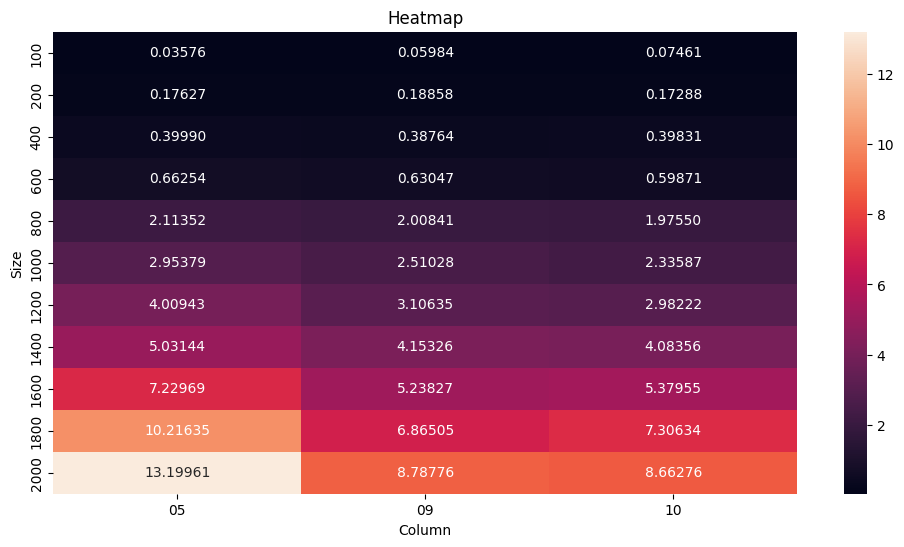

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Создаем DataFrame из ваших данных
data = {
    'Size': [100, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
    '05': [0.035756, 0.176273, 0.399895, 0.662537, 2.113521, 2.953795, 4.009433, 5.031438, 7.229693, 10.216351, 13.199615],
    '09': [0.059843, 0.188577, 0.387635, 0.630470, 2.008406, 2.510276, 3.106348, 4.153259, 5.238271, 6.865048, 8.787762],
    '10': [0.07461, 0.172876, 0.398305, 0.598711, 1.975504, 2.335871, 2.982222, 4.083563, 5.37955, 7.306337, 8.662763]
}
df = pd.DataFrame(data)

# Преобразуем данные в формат, подходящий для построения heatmap
df_melted = df.melt(id_vars='Size', var_name='Column', value_name='Value')

# Строим тепловую карту
plt.figure(figsize=(12, 6))
ax = sns.heatmap(df_melted.pivot(index='Size', columns='Column', values='Value'), annot=True, fmt=".5f")
ax.set_title('Heatmap')
plt.show()

In [44]:
import pandas as pd

def md_to_pd(markdown_table):
    # Step 1: Split the text into rows
    rows = markdown_table.strip().split('\n')

    # Step 2: Extract column names from the first row
    column_names = rows[0].strip('|').strip().split('|')
    column_names = [name.strip() for name in column_names]

    # print(column_names)
    # Step 3: Extract data from each row starting from the second row
    data = []
    for row in rows[2:]:
        # Remove leading and trailing pipes, then split by pipe character
        values = row.strip('|').strip().split('|')
        
        # Strip whitespace from each value
        values = [value.strip() for value in values]
        
        # Convert numeric strings to floats where applicable
        try:
            values = [float(value) if value else None for value in values]
            values = [int(value) if value == int(value) else value for value in values]
        except ValueError:
            pass

        
        data.append(values)

    # Step 4: Create a Pandas DataFrame from the extracted data
    df = pd.DataFrame(data, columns=column_names)
    return df

mf = open("./ppp_out/slurm-20599.out")
mf.readline()
markdown_table = mf.read()
df = md_to_pd(markdown_table).query("Size > 10")

for i in range(20589, 20599):
    try: 
        mf = open("./ppp_out/slurm-{:}.out".format(i))
        mf.readline()
        markdown_table = mf.read()

        df = pd.concat([df, md_to_pd(markdown_table).query("Size > 10")], ignore_index=True)
        df.append()
    except:
        pass    



from IPython.display import display, Math, Latex, Markdown

display(Markdown(df.pivot(index='Size', columns='PC', values='Time').to_markdown()))
print(df.pivot(index='Size', columns='PC', values='Time').to_latex())

|   Size |         1 |         2 |         3 |         4 |         5 |         6 |         7 |        8 |        9 |       10 |
|-------:|----------:|----------:|----------:|----------:|----------:|----------:|----------:|---------:|---------:|---------:|
|    100 |  0.006394 |  0.023182 |  0.024991 |  0.031666 |  0.033614 |  0.080891 |  0.084673 | 0.044982 | 0.088079 | 0.042614 |
|    200 |  0.049006 |  0.068286 |  0.064159 |  0.079661 |  0.064122 |  0.076203 |  0.080593 | 0.101212 | 0.079212 | 0.093207 |
|    400 |  0.380923 |  0.296383 |  0.23786  |  0.249735 |  0.200218 |  0.219445 |  0.224407 | 0.242144 | 0.216766 | 0.236721 |
|    600 |  1.28337  |  0.808884 |  0.631441 |  0.677362 |  0.557427 |  0.476089 |  0.504791 | 0.552051 | 0.519817 | 0.518482 |
|    800 |  3.01492  |  2.81906  |  1.37903  |  2.24927  |  2.24755  |  1.96158  |  1.05344  | 1.05646  | 2.24082  | 2.10216  |
|   1000 |  5.88123  |  3.35562  |  2.37201  |  3.12721  |  2.88784  |  2.74676  |  2.7091   | 2.11926  | 2.46121  | 2.47662  |
|   1200 | 10.5173   |  5.65234  |  3.93687  |  4.1291   |  4.09964  |  3.70942  |  3.44091  | 2.71961  | 3.33405  | 3.16897  |
|   1400 | 16.7337   |  9.08138  |  6.13656  |  5.08584  |  5.25734  |  5.03406  |  4.65506  | 3.64063  | 4.5631   | 4.25697  |
|   1600 | 25.4033   | 13.5625   |  9.20356  |  7.37683  |  7.25352  |  6.3816   |  6.08608  | 5.28101  | 5.27691  | 5.21334  |
|   1800 | 35.814    | 19.422    | 13.2437   | 11.2989   | 10.014    |  8.17851  |  8.18132  | 7.57751  | 7.30103  | 6.78376  |
|   2000 | 49.3246   | 26.5586   | 18.0766   | 14.4252   | 12.5011   | 11.9355   | 10.2482   | 9.48142  | 9.10615  | 8.23785  |

\begin{tabular}{lrrrrrrrrrr}
\toprule
PC & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10 \\
Size &  &  &  &  &  &  &  &  &  &  \\
\midrule
100 & 0.006394 & 0.023182 & 0.024991 & 0.031666 & 0.033614 & 0.080891 & 0.084673 & 0.044982 & 0.088079 & 0.042614 \\
200 & 0.049006 & 0.068286 & 0.064159 & 0.079661 & 0.064122 & 0.076203 & 0.080593 & 0.101212 & 0.079212 & 0.093207 \\
400 & 0.380923 & 0.296383 & 0.237860 & 0.249735 & 0.200218 & 0.219445 & 0.224407 & 0.242144 & 0.216766 & 0.236721 \\
600 & 1.283368 & 0.808884 & 0.631441 & 0.677362 & 0.557427 & 0.476089 & 0.504791 & 0.552051 & 0.519817 & 0.518482 \\
800 & 3.014916 & 2.819056 & 1.379033 & 2.249270 & 2.247548 & 1.961575 & 1.053437 & 1.056456 & 2.240817 & 2.102161 \\
1000 & 5.881229 & 3.355625 & 2.372011 & 3.127212 & 2.887842 & 2.746757 & 2.709100 & 2.119264 & 2.461212 & 2.476617 \\
1200 & 10.517283 & 5.652336 & 3.936872 & 4.129103 & 4.099637 & 3.709419 & 3.440915 & 2.719612 & 3.334045 & 3.168967 \\
1400 & 16.733725 & 9.081385 & 6.136562 & 5.085

In [45]:
import pandas as pd

def md_to_pd(markdown_table):
    # Step 1: Split the text into rows
    rows = markdown_table.strip().split('\n')

    # Step 2: Extract column names from the first row
    column_names = rows[0].strip('|').strip().split('|')
    column_names = [name.strip() for name in column_names]

    # print(column_names)
    # Step 3: Extract data from each row starting from the second row
    data = []
    for row in rows[2:]:
        # Remove leading and trailing pipes, then split by pipe character
        values = row.strip('|').strip().split('|')
        
        # Strip whitespace from each value
        values = [value.strip() for value in values]
        
        # Convert numeric strings to floats where applicable
        try:
            values = [float(value) if value else None for value in values]
            values = [int(value) if value == int(value) else value for value in values]
        except ValueError:
            pass

        
        data.append(values)

    # Step 4: Create a Pandas DataFrame from the extracted data
    df = pd.DataFrame(data, columns=column_names)
    return df


mf = open("./ppp_out2/slurm-20598.out")
mf.readline()
markdown_table = mf.read()
df = md_to_pd(markdown_table).query("Size > 10")

for i in range(24286, 24295):
    try: 
        mf = open("./ppp_out2/slurm-{:}.out".format(i))
        mf.readline()
        markdown_table = mf.read()

        df = pd.concat([df, md_to_pd(markdown_table).query("Size > 10")], ignore_index=True)
        df.append()
    except:
        pass    



from IPython.display import display, Math, Latex, Markdown

display(Markdown(df.pivot(index='Size', columns='PC', values='Time').to_markdown()))
print(df.pivot(index='Size', columns='PC', values='Time').to_latex())

|   Size |         1 |        2 |        3 |        4 |        5 |        6 |        7 |        8 |        9 |       10 |
|-------:|----------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|
|    100 |  0.006394 | 0.022285 | 0.022467 | 0.025974 | 0.031584 | 0.040274 | 0.03884  | 0.048682 | 0.045981 | 0.043549 |
|    200 |  0.049006 | 0.053071 | 0.056567 | 0.065056 | 0.066548 | 0.090366 | 0.091065 | 0.115238 | 0.091614 | 0.112746 |
|    400 |  0.380923 | 0.16707  | 0.158591 | 0.165575 | 0.159275 | 0.209427 | 0.206105 | 0.247948 | 0.217521 | 0.249661 |
|    600 |  1.28337  | 0.414224 | 0.342996 | 0.354479 | 0.325922 | 0.37773  | 0.383978 | 0.481832 | 0.348573 | 0.409963 |
|    800 |  3.01492  | 1.76115  | 0.610183 | 1.66845  | 0.579574 | 1.81043  | 0.725445 | 0.873781 | 1.8309   | 0.795532 |
|   1000 |  5.88123  | 1.25951  | 2.01246  | 1.87076  | 0.901803 | 2.29575  | 2.262    | 2.25216  | 2.35021  | 2.10131  |
|   1200 | 10.5173   | 2.61155  | 2.35906  | 2.35615  | 2.66904  | 2.49252  | 2.36397  | 2.41371  | 2.52252  | 2.51149  |
|   1400 | 16.7337   | 3.93866  | 3.12897  | 3.50311  | 3.48598  | 2.97492  | 3.02618  | 2.88964  | 2.97339  | 3.29507  |
|   1600 | 25.4033   | 4.18822  | 3.62886  | 4.11075  | 4.1734   | 3.78112  | 3.92954  | 3.86923  | 3.7123   | 3.4382   |
|   1800 | 35.814    | 5.75867  | 4.80055  | 4.77032  | 4.99364  | 4.74495  | 4.6456   | 4.68899  | 4.80431  | 4.48825  |
|   2000 | 49.3246   | 8.04117  | 6.72675  | 6.5141   | 5.53511  | 5.50056  | 5.37189  | 5.57053  | 5.23932  | 5.09373  |

\begin{tabular}{lrrrrrrrrrr}
\toprule
PC & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10 \\
Size &  &  &  &  &  &  &  &  &  &  \\
\midrule
100 & 0.006394 & 0.022285 & 0.022467 & 0.025974 & 0.031584 & 0.040274 & 0.038840 & 0.048682 & 0.045981 & 0.043549 \\
200 & 0.049006 & 0.053071 & 0.056567 & 0.065056 & 0.066548 & 0.090366 & 0.091065 & 0.115238 & 0.091614 & 0.112746 \\
400 & 0.380923 & 0.167070 & 0.158591 & 0.165575 & 0.159275 & 0.209427 & 0.206105 & 0.247948 & 0.217521 & 0.249661 \\
600 & 1.283368 & 0.414224 & 0.342996 & 0.354479 & 0.325922 & 0.377730 & 0.383978 & 0.481832 & 0.348573 & 0.409963 \\
800 & 3.014916 & 1.761148 & 0.610183 & 1.668453 & 0.579574 & 1.810430 & 0.725445 & 0.873781 & 1.830903 & 0.795532 \\
1000 & 5.881229 & 1.259505 & 2.012462 & 1.870761 & 0.901803 & 2.295745 & 2.262003 & 2.252161 & 2.350214 & 2.101307 \\
1200 & 10.517283 & 2.611549 & 2.359056 & 2.356151 & 2.669037 & 2.492522 & 2.363975 & 2.413705 & 2.522517 & 2.511492 \\
1400 & 16.733725 & 3.938665 & 3.128968 & 3.503

In [46]:
df_pc1 = df.query("PC == 1")

# display(df_pc1)
# Шаг 2: Вычисляем новые значения для S

df['S'] = df.apply(lambda row: df_pc1.query(f"Size == {row['Size']}")['Time'].values[0] / row['Time'], axis=1)
df['E'] = df.apply(lambda row: row['S'] / row['PC'], axis=1)



print("Time")
display(Markdown(df.pivot(index='Size', columns='PC', values='Time').to_markdown()))

print("S")
display(Markdown(df.pivot(index='Size', columns='PC', values='S').to_markdown()))

print("E")
display(Markdown(df.pivot(index='Size', columns='PC', values='E').to_markdown()))

display(Markdown(df.to_markdown()))




Time


|   Size |         1 |        2 |        3 |        4 |        5 |        6 |        7 |        8 |        9 |       10 |
|-------:|----------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|
|    100 |  0.006394 | 0.022285 | 0.022467 | 0.025974 | 0.031584 | 0.040274 | 0.03884  | 0.048682 | 0.045981 | 0.043549 |
|    200 |  0.049006 | 0.053071 | 0.056567 | 0.065056 | 0.066548 | 0.090366 | 0.091065 | 0.115238 | 0.091614 | 0.112746 |
|    400 |  0.380923 | 0.16707  | 0.158591 | 0.165575 | 0.159275 | 0.209427 | 0.206105 | 0.247948 | 0.217521 | 0.249661 |
|    600 |  1.28337  | 0.414224 | 0.342996 | 0.354479 | 0.325922 | 0.37773  | 0.383978 | 0.481832 | 0.348573 | 0.409963 |
|    800 |  3.01492  | 1.76115  | 0.610183 | 1.66845  | 0.579574 | 1.81043  | 0.725445 | 0.873781 | 1.8309   | 0.795532 |
|   1000 |  5.88123  | 1.25951  | 2.01246  | 1.87076  | 0.901803 | 2.29575  | 2.262    | 2.25216  | 2.35021  | 2.10131  |
|   1200 | 10.5173   | 2.61155  | 2.35906  | 2.35615  | 2.66904  | 2.49252  | 2.36397  | 2.41371  | 2.52252  | 2.51149  |
|   1400 | 16.7337   | 3.93866  | 3.12897  | 3.50311  | 3.48598  | 2.97492  | 3.02618  | 2.88964  | 2.97339  | 3.29507  |
|   1600 | 25.4033   | 4.18822  | 3.62886  | 4.11075  | 4.1734   | 3.78112  | 3.92954  | 3.86923  | 3.7123   | 3.4382   |
|   1800 | 35.814    | 5.75867  | 4.80055  | 4.77032  | 4.99364  | 4.74495  | 4.6456   | 4.68899  | 4.80431  | 4.48825  |
|   2000 | 49.3246   | 8.04117  | 6.72675  | 6.5141   | 5.53511  | 5.50056  | 5.37189  | 5.57053  | 5.23932  | 5.09373  |

S


|   Size |   1 |        2 |        3 |        4 |        5 |        6 |        7 |        8 |        9 |       10 |
|-------:|----:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|---------:|
|    100 |   1 | 0.286919 | 0.284595 | 0.246169 | 0.202444 | 0.158762 | 0.164624 | 0.131342 | 0.139057 | 0.146823 |
|    200 |   1 | 0.923404 | 0.866335 | 0.753289 | 0.736401 | 0.542306 | 0.538143 | 0.425259 | 0.534918 | 0.434658 |
|    400 |   1 | 2.28002  | 2.40192  | 2.30061  | 2.39161  | 1.81888  | 1.8482   | 1.5363   | 1.7512   | 1.52576  |
|    600 |   1 | 3.09825  | 3.74164  | 3.62043  | 3.93765  | 3.39758  | 3.3423   | 2.66352  | 3.68178  | 3.13045  |
|    800 |   1 | 1.7119   | 4.941    | 1.80701  | 5.20195  | 1.6653   | 4.15595  | 3.45043  | 1.64668  | 3.78981  |
|   1000 |   1 | 4.66948  | 2.9224   | 3.14376  | 6.52163  | 2.5618   | 2.60001  | 2.61137  | 2.50242  | 2.79884  |
|   1200 |   1 | 4.02722  | 4.45826  | 4.46376  | 3.94048  | 4.21953  | 4.44898  | 4.35732  | 4.16936  | 4.18766  |
|   1400 |   1 | 4.24858  | 5.348    | 4.77682  | 4.80029  | 5.62494  | 5.52965  | 5.79094  | 5.62783  | 5.07841  |
|   1600 |   1 | 6.06543  | 7.00036  | 6.17973  | 6.08696  | 6.71847  | 6.46471  | 6.56548  | 6.84301  | 7.38855  |
|   1800 |   1 | 6.21915  | 7.4604   | 7.50767  | 7.17193  | 7.54782  | 7.70923  | 7.63789  | 7.45457  | 7.9795   |
|   2000 |   1 | 6.13402  | 7.33261  | 7.57198  | 8.91124  | 8.96721  | 9.18199  | 8.85456  | 9.41432  | 9.68341  |

E


|   Size |   1 |        2 |         3 |         4 |         5 |         6 |         7 |         8 |         9 |        10 |
|-------:|----:|---------:|----------:|----------:|----------:|----------:|----------:|----------:|----------:|----------:|
|    100 |   1 | 0.14346  | 0.0948651 | 0.0615423 | 0.0404889 | 0.0264604 | 0.0235177 | 0.0164178 | 0.0154508 | 0.0146823 |
|    200 |   1 | 0.461702 | 0.288778  | 0.188322  | 0.14728   | 0.0903843 | 0.0768776 | 0.0531574 | 0.0594354 | 0.0434658 |
|    400 |   1 | 1.14001  | 0.80064   | 0.575152  | 0.478321  | 0.303147  | 0.264028  | 0.192038  | 0.194578  | 0.152576  |
|    600 |   1 | 1.54912  | 1.24721   | 0.905109  | 0.787531  | 0.566263  | 0.477471  | 0.33294   | 0.409086  | 0.313045  |
|    800 |   1 | 0.855952 | 1.647     | 0.451753  | 1.04039   | 0.277551  | 0.593708  | 0.431303  | 0.182965  | 0.378981  |
|   1000 |   1 | 2.33474  | 0.974135  | 0.785941  | 1.30433   | 0.426966  | 0.37143   | 0.326421  | 0.278047  | 0.279884  |
|   1200 |   1 | 2.01361  | 1.48609   | 1.11594   | 0.788096  | 0.703256  | 0.635569  | 0.544665  | 0.463262  | 0.418766  |
|   1400 |   1 | 2.12429  | 1.78267   | 1.1942    | 0.960058  | 0.93749   | 0.78995   | 0.723867  | 0.625314  | 0.507841  |
|   1600 |   1 | 3.03272  | 2.33345   | 1.54493   | 1.21739   | 1.11974   | 0.92353   | 0.820685  | 0.760335  | 0.738855  |
|   1800 |   1 | 3.10957  | 2.4868    | 1.87692   | 1.43439   | 1.25797   | 1.10132   | 0.954737  | 0.828285  | 0.79795   |
|   2000 |   1 | 3.06701  | 2.4442    | 1.893     | 1.78225   | 1.49453   | 1.31171   | 1.10682   | 1.04604   | 0.968341  |

|     |      Time |   Size |       Error |   PC |        S |         E |
|----:|----------:|-------:|------------:|-----:|---------:|----------:|
|   0 |  0.006394 |    100 | 0.0151787   |    1 | 1        | 1         |
|   1 |  0.049006 |    200 | 0.0088713   |    1 | 1        | 1         |
|   2 |  0.380923 |    400 | 0.010984    |    1 | 1        | 1         |
|   3 |  1.28337  |    600 | 0.00281236  |    1 | 1        | 1         |
|   4 |  3.01492  |    800 | 0.00864918  |    1 | 1        | 1         |
|   5 |  5.88123  |   1000 | 0.00204463  |    1 | 1        | 1         |
|   6 | 10.5173   |   1200 | 0.00625005  |    1 | 1        | 1         |
|   7 | 16.7337   |   1400 | 0.00309417  |    1 | 1        | 1         |
|   8 | 25.4033   |   1600 | 0.00148161  |    1 | 1        | 1         |
|   9 | 35.814    |   1800 | 0.00190948  |    1 | 1        | 1         |
|  10 | 49.3246   |   2000 | 0.00191338  |    1 | 1        | 1         |
|  11 |  0.043549 |    100 | 7.37049e-13 |   10 | 0.146823 | 0.0146823 |
|  12 |  0.112746 |    200 | 6.41361e-11 |   10 | 0.434658 | 0.0434658 |
|  13 |  0.249661 |    400 | 1.35179e-11 |   10 | 1.52576  | 0.152576  |
|  14 |  0.409963 |    600 | 2.87208e-10 |   10 | 3.13045  | 0.313045  |
|  15 |  0.795532 |    800 | 4.04892e-10 |   10 | 3.78981  | 0.378981  |
|  16 |  2.10131  |   1000 | 8.19912e-10 |   10 | 2.79884  | 0.279884  |
|  17 |  2.51149  |   1200 | 5.78746e-10 |   10 | 4.18766  | 0.418766  |
|  18 |  3.29507  |   1400 | 4.92133e-09 |   10 | 5.07841  | 0.507841  |
|  19 |  3.4382   |   1600 | 1.1975e-09  |   10 | 7.38855  | 0.738855  |
|  20 |  4.48825  |   1800 | 5.35079e-10 |   10 | 7.9795   | 0.79795   |
|  21 |  5.09373  |   2000 | 4.44049e-09 |   10 | 9.68341  | 0.968341  |
|  22 |  0.045981 |    100 | 7.37049e-13 |    9 | 0.139057 | 0.0154508 |
|  23 |  0.091614 |    200 | 6.41361e-11 |    9 | 0.534918 | 0.0594354 |
|  24 |  0.217521 |    400 | 1.35179e-11 |    9 | 1.7512   | 0.194578  |
|  25 |  0.348573 |    600 | 2.87208e-10 |    9 | 3.68178  | 0.409086  |
|  26 |  1.8309   |    800 | 4.04892e-10 |    9 | 1.64668  | 0.182965  |
|  27 |  2.35021  |   1000 | 8.19912e-10 |    9 | 2.50242  | 0.278047  |
|  28 |  2.52252  |   1200 | 5.78746e-10 |    9 | 4.16936  | 0.463262  |
|  29 |  2.97339  |   1400 | 4.92133e-09 |    9 | 5.62783  | 0.625314  |
|  30 |  3.7123   |   1600 | 1.1975e-09  |    9 | 6.84301  | 0.760335  |
|  31 |  4.80431  |   1800 | 5.35079e-10 |    9 | 7.45457  | 0.828285  |
|  32 |  5.23932  |   2000 | 4.44049e-09 |    9 | 9.41432  | 1.04604   |
|  33 |  0.048682 |    100 | 7.37049e-13 |    8 | 0.131342 | 0.0164178 |
|  34 |  0.115238 |    200 | 6.41361e-11 |    8 | 0.425259 | 0.0531574 |
|  35 |  0.247948 |    400 | 1.35179e-11 |    8 | 1.5363   | 0.192038  |
|  36 |  0.481832 |    600 | 2.87208e-10 |    8 | 2.66352  | 0.33294   |
|  37 |  0.873781 |    800 | 4.04892e-10 |    8 | 3.45043  | 0.431303  |
|  38 |  2.25216  |   1000 | 8.19912e-10 |    8 | 2.61137  | 0.326421  |
|  39 |  2.41371  |   1200 | 5.78746e-10 |    8 | 4.35732  | 0.544665  |
|  40 |  2.88964  |   1400 | 4.92133e-09 |    8 | 5.79094  | 0.723867  |
|  41 |  3.86923  |   1600 | 1.1975e-09  |    8 | 6.56548  | 0.820685  |
|  42 |  4.68899  |   1800 | 5.35079e-10 |    8 | 7.63789  | 0.954737  |
|  43 |  5.57053  |   2000 | 4.44049e-09 |    8 | 8.85456  | 1.10682   |
|  44 |  0.03884  |    100 | 7.37049e-13 |    7 | 0.164624 | 0.0235177 |
|  45 |  0.091065 |    200 | 6.41361e-11 |    7 | 0.538143 | 0.0768776 |
|  46 |  0.206105 |    400 | 1.35179e-11 |    7 | 1.8482   | 0.264028  |
|  47 |  0.383978 |    600 | 2.87208e-10 |    7 | 3.3423   | 0.477471  |
|  48 |  0.725445 |    800 | 4.04892e-10 |    7 | 4.15595  | 0.593708  |
|  49 |  2.262    |   1000 | 8.19912e-10 |    7 | 2.60001  | 0.37143   |
|  50 |  2.36397  |   1200 | 5.78746e-10 |    7 | 4.44898  | 0.635569  |
|  51 |  3.02618  |   1400 | 4.92133e-09 |    7 | 5.52965  | 0.78995   |
|  52 |  3.92954  |   1600 | 1.1975e-09  |    7 | 6.46471  | 0.92353   |
|  53 |  4.6456   |   1800 | 5.35079e-10 |    7 | 7.70923  | 1.10132   |
|  54 |  5.37189  |   2000 | 4.44049e-09 |    7 | 9.18199  | 1.31171   |
|  55 |  0.040274 |    100 | 7.37049e-13 |    6 | 0.158762 | 0.0264604 |
|  56 |  0.090366 |    200 | 6.41361e-11 |    6 | 0.542306 | 0.0903843 |
|  57 |  0.209427 |    400 | 1.35179e-11 |    6 | 1.81888  | 0.303147  |
|  58 |  0.37773  |    600 | 2.87208e-10 |    6 | 3.39758  | 0.566263  |
|  59 |  1.81043  |    800 | 4.04892e-10 |    6 | 1.6653   | 0.277551  |
|  60 |  2.29575  |   1000 | 8.19912e-10 |    6 | 2.5618   | 0.426966  |
|  61 |  2.49252  |   1200 | 5.78746e-10 |    6 | 4.21953  | 0.703256  |
|  62 |  2.97492  |   1400 | 4.92133e-09 |    6 | 5.62494  | 0.93749   |
|  63 |  3.78112  |   1600 | 1.1975e-09  |    6 | 6.71847  | 1.11974   |
|  64 |  4.74495  |   1800 | 5.35079e-10 |    6 | 7.54782  | 1.25797   |
|  65 |  5.50056  |   2000 | 4.44049e-09 |    6 | 8.96721  | 1.49453   |
|  66 |  0.031584 |    100 | 7.37049e-13 |    5 | 0.202444 | 0.0404889 |
|  67 |  0.066548 |    200 | 6.41361e-11 |    5 | 0.736401 | 0.14728   |
|  68 |  0.159275 |    400 | 1.35179e-11 |    5 | 2.39161  | 0.478321  |
|  69 |  0.325922 |    600 | 2.87208e-10 |    5 | 3.93765  | 0.787531  |
|  70 |  0.579574 |    800 | 4.04892e-10 |    5 | 5.20195  | 1.04039   |
|  71 |  0.901803 |   1000 | 8.19912e-10 |    5 | 6.52163  | 1.30433   |
|  72 |  2.66904  |   1200 | 5.78746e-10 |    5 | 3.94048  | 0.788096  |
|  73 |  3.48598  |   1400 | 4.92133e-09 |    5 | 4.80029  | 0.960058  |
|  74 |  4.1734   |   1600 | 1.1975e-09  |    5 | 6.08696  | 1.21739   |
|  75 |  4.99364  |   1800 | 5.35079e-10 |    5 | 7.17193  | 1.43439   |
|  76 |  5.53511  |   2000 | 4.44049e-09 |    5 | 8.91124  | 1.78225   |
|  77 |  0.025974 |    100 | 7.37049e-13 |    4 | 0.246169 | 0.0615423 |
|  78 |  0.065056 |    200 | 6.41361e-11 |    4 | 0.753289 | 0.188322  |
|  79 |  0.165575 |    400 | 1.35179e-11 |    4 | 2.30061  | 0.575152  |
|  80 |  0.354479 |    600 | 2.87208e-10 |    4 | 3.62043  | 0.905109  |
|  81 |  1.66845  |    800 | 4.04892e-10 |    4 | 1.80701  | 0.451753  |
|  82 |  1.87076  |   1000 | 8.19912e-10 |    4 | 3.14376  | 0.785941  |
|  83 |  2.35615  |   1200 | 5.78746e-10 |    4 | 4.46376  | 1.11594   |
|  84 |  3.50311  |   1400 | 4.92133e-09 |    4 | 4.77682  | 1.1942    |
|  85 |  4.11075  |   1600 | 1.1975e-09  |    4 | 6.17973  | 1.54493   |
|  86 |  4.77032  |   1800 | 5.35079e-10 |    4 | 7.50767  | 1.87692   |
|  87 |  6.5141   |   2000 | 4.44049e-09 |    4 | 7.57198  | 1.893     |
|  88 |  0.022467 |    100 | 7.37049e-13 |    3 | 0.284595 | 0.0948651 |
|  89 |  0.056567 |    200 | 6.41361e-11 |    3 | 0.866335 | 0.288778  |
|  90 |  0.158591 |    400 | 1.35179e-11 |    3 | 2.40192  | 0.80064   |
|  91 |  0.342996 |    600 | 2.87208e-10 |    3 | 3.74164  | 1.24721   |
|  92 |  0.610183 |    800 | 4.04892e-10 |    3 | 4.941    | 1.647     |
|  93 |  2.01246  |   1000 | 8.19912e-10 |    3 | 2.9224   | 0.974135  |
|  94 |  2.35906  |   1200 | 5.78746e-10 |    3 | 4.45826  | 1.48609   |
|  95 |  3.12897  |   1400 | 4.92133e-09 |    3 | 5.348    | 1.78267   |
|  96 |  3.62886  |   1600 | 1.1975e-09  |    3 | 7.00036  | 2.33345   |
|  97 |  4.80055  |   1800 | 5.35079e-10 |    3 | 7.4604   | 2.4868    |
|  98 |  6.72675  |   2000 | 4.44049e-09 |    3 | 7.33261  | 2.4442    |
|  99 |  0.022285 |    100 | 7.37049e-13 |    2 | 0.286919 | 0.14346   |
| 100 |  0.053071 |    200 | 6.41361e-11 |    2 | 0.923404 | 0.461702  |
| 101 |  0.16707  |    400 | 1.35179e-11 |    2 | 2.28002  | 1.14001   |
| 102 |  0.414224 |    600 | 2.87208e-10 |    2 | 3.09825  | 1.54912   |
| 103 |  1.76115  |    800 | 4.04892e-10 |    2 | 1.7119   | 0.855952  |
| 104 |  1.25951  |   1000 | 8.19912e-10 |    2 | 4.66948  | 2.33474   |
| 105 |  2.61155  |   1200 | 5.78746e-10 |    2 | 4.02722  | 2.01361   |
| 106 |  3.93866  |   1400 | 4.92133e-09 |    2 | 4.24858  | 2.12429   |
| 107 |  4.18822  |   1600 | 1.1975e-09  |    2 | 6.06543  | 3.03272   |
| 108 |  5.75867  |   1800 | 5.35079e-10 |    2 | 6.21915  | 3.10957   |
| 109 |  8.04117  |   2000 | 4.44049e-09 |    2 | 6.13402  | 3.06701   |

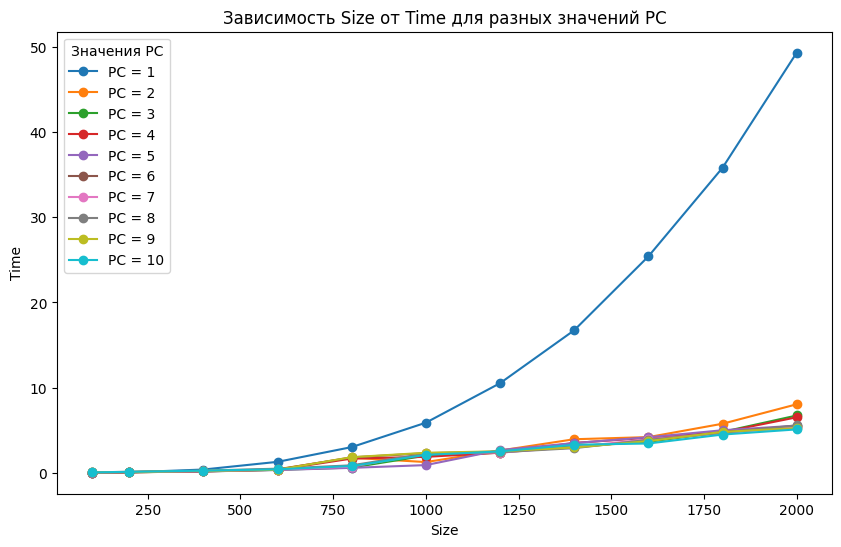

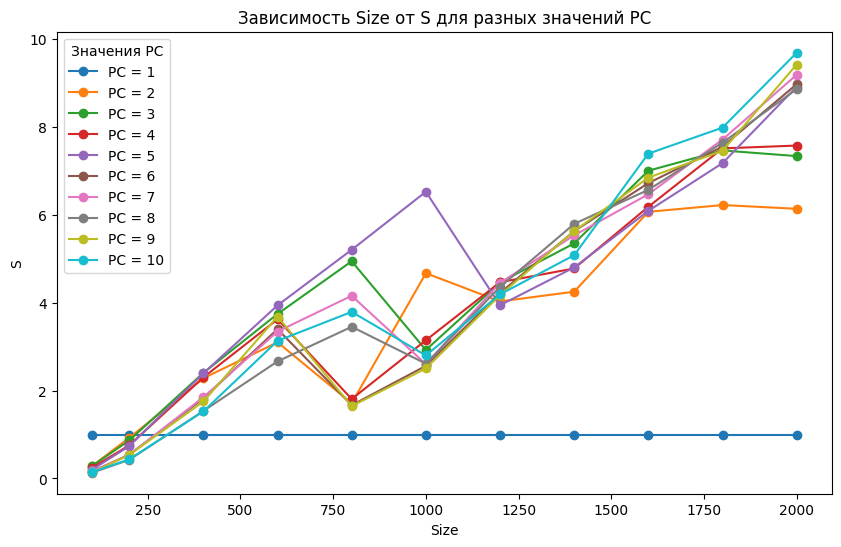

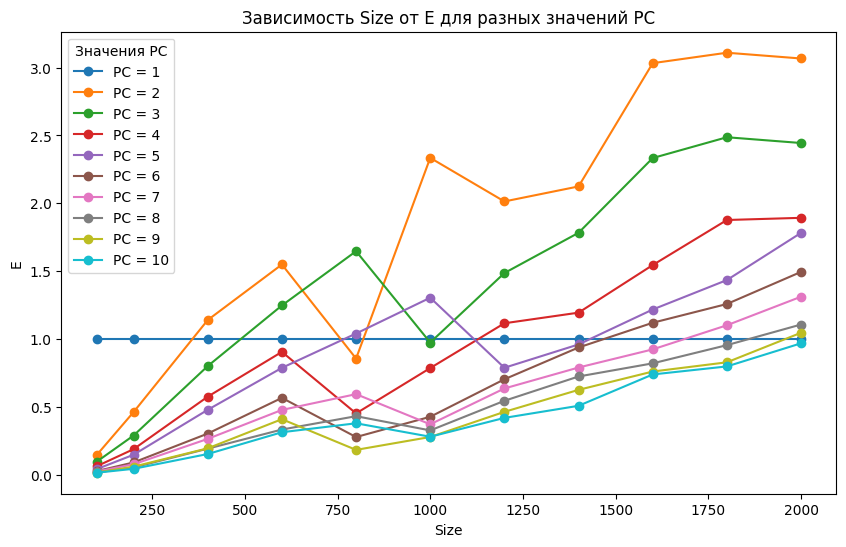

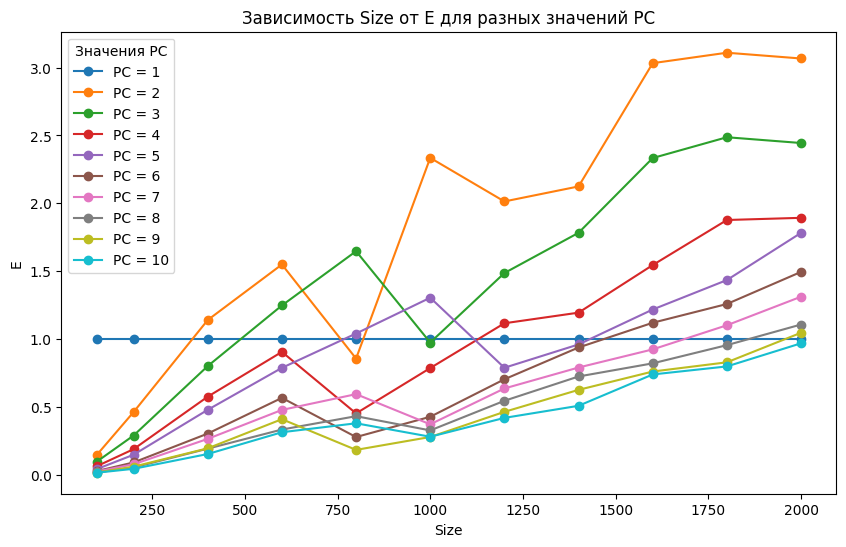

In [47]:
def plot_axis(name):
    # Создание фигуры и оси
    fig, ax = plt.subplots(figsize=(10, 6))

    # Цикл по каждому уникальному значению PC
    for pc in range(1,11):
        # Фильтрация данных по текущему значению PC
        subset = df.query(f'PC == {pc}')
        
        # Построение линии для текущего PC
        ax.plot(subset['Size'], subset[name], marker='o', linestyle='-', label=f'PC = {pc}')

    # Настройка подписей и легенды
    # ax.set_yscale('log')
    ax.set_xlabel('Size')
    ax.set_ylabel(name)
    ax.legend(title='Значения PC')

    # Название графика
    plt.title('Зависимость Size от ' + name + ' для разных значений PC')

    # Показ графика
    plt.show()
    return fig

f = plot_axis('Time')

f.savefig("test.svg", format="svg")

plot_axis('S')
plot_axis('E')


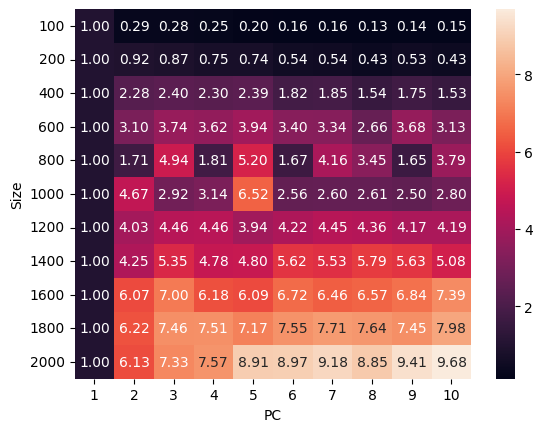

In [48]:
sns.heatmap(df.pivot(index='Size', columns='PC', values='S'), annot=True, fmt=".2f")
plt.savefig("heatmap_s.svg", format="svg", bbox_inches='tight')

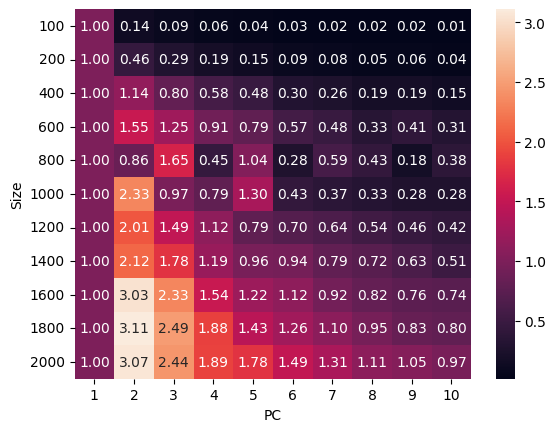

In [49]:
sns.heatmap(df.pivot(index='Size', columns='PC', values='E'), annot=True, fmt=".2f")
plt.savefig("heatmap_e.svg", format="svg", bbox_inches='tight')

In [50]:
def create_table_for_size(df, size):
    # Фильтруем строки, соответствующие указанному размеру
    filtered_df = df.query(f"Size == {size}")
    
    grouped_df = filtered_df[['PC','Time', 'S', 'E']].reset_index()
    
    # Переставляем столбцы, чтобы 'PC' оказался первым
    columns_order = ['PC', 'Time', 'S', 'E']
    grouped_df = grouped_df.reindex(columns=columns_order)
    
    # Транспонируем DataFrame
    transformed_df = grouped_df.set_index('PC').T
    
    return transformed_df



display(create_table_for_size(df, 100))
display(create_table_for_size(df, 1000))
display(create_table_for_size(df, 2000))


# Функция для форматирования чисел до трех знаков после запятой
def format_floats(df):
    for col in df.columns:
        if isinstance(col, float) or isinstance(col, int):
            df[col] = df[col].map(lambda x: f"{x:.3f}")
    return df


print(format_floats(create_table_for_size(df, 100)).to_latex())
print(format_floats(create_table_for_size(df, 1000)).to_latex())
print(format_floats(create_table_for_size(df, 2000)).to_latex())

PC,1,10,9,8,7,6,5,4,3,2
Time,0.006394,0.043549,0.045981,0.048682,0.038840,0.040274,0.031584,0.025974,0.022467,0.022285
S,1.000000,0.146823,0.139057,0.131342,0.164624,0.158762,0.202444,0.246169,0.284595,0.286919
E,1.000000,0.014682,0.015451,0.016418,0.023518,0.026460,0.040489,0.061542,0.094865,0.143460


PC,1,10,9,8,7,6,5,4,3,2
Time,5.881229,2.101307,2.350214,2.252161,2.262003,2.295745,0.901803,1.870761,2.012462,1.259505
S,1.000000,2.798843,2.502423,2.611371,2.600009,2.561795,6.521634,3.143763,2.922405,4.669477
E,1.000000,0.279884,0.278047,0.326421,0.371430,0.426966,1.304327,0.785941,0.974135,2.334738


PC,1,10,9,8,7,6,5,4,3,2
Time,49.32465,5.093726,5.239319,5.570534,5.371892,5.500559,5.535107,6.514101,6.726755,8.041166
S,1.00000,9.683412,9.414325,8.854564,9.181988,8.967207,8.911237,7.571981,7.332607,6.134017
E,1.00000,0.968341,1.046036,1.106821,1.311713,1.494534,1.782247,1.892995,2.444202,3.067009


\begin{tabular}{lllllllllll}
\toprule
PC & 1 & 10 & 9 & 8 & 7 & 6 & 5 & 4 & 3 & 2 \\
\midrule
Time & 0.006 & 0.044 & 0.046 & 0.049 & 0.039 & 0.040 & 0.032 & 0.026 & 0.022 & 0.022 \\
S & 1.000 & 0.147 & 0.139 & 0.131 & 0.165 & 0.159 & 0.202 & 0.246 & 0.285 & 0.287 \\
E & 1.000 & 0.015 & 0.015 & 0.016 & 0.024 & 0.026 & 0.040 & 0.062 & 0.095 & 0.143 \\
\bottomrule
\end{tabular}

\begin{tabular}{lllllllllll}
\toprule
PC & 1 & 10 & 9 & 8 & 7 & 6 & 5 & 4 & 3 & 2 \\
\midrule
Time & 5.881 & 2.101 & 2.350 & 2.252 & 2.262 & 2.296 & 0.902 & 1.871 & 2.012 & 1.260 \\
S & 1.000 & 2.799 & 2.502 & 2.611 & 2.600 & 2.562 & 6.522 & 3.144 & 2.922 & 4.669 \\
E & 1.000 & 0.280 & 0.278 & 0.326 & 0.371 & 0.427 & 1.304 & 0.786 & 0.974 & 2.335 \\
\bottomrule
\end{tabular}

\begin{tabular}{lllllllllll}
\toprule
PC & 1 & 10 & 9 & 8 & 7 & 6 & 5 & 4 & 3 & 2 \\
\midrule
Time & 49.325 & 5.094 & 5.239 & 5.571 & 5.372 & 5.501 & 5.535 & 6.514 & 6.727 & 8.041 \\
S & 1.000 & 9.683 & 9.414 & 8.855 & 9.182 & 8.967 & 8.911 &

In [51]:
print(format_floats(df.pivot(index='Size', columns='PC', values='Time')).to_latex())

\begin{tabular}{lllllllllll}
\toprule
PC & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10 \\
Size &  &  &  &  &  &  &  &  &  &  \\
\midrule
100 & 0.006 & 0.022 & 0.022 & 0.026 & 0.032 & 0.040 & 0.039 & 0.049 & 0.046 & 0.044 \\
200 & 0.049 & 0.053 & 0.057 & 0.065 & 0.067 & 0.090 & 0.091 & 0.115 & 0.092 & 0.113 \\
400 & 0.381 & 0.167 & 0.159 & 0.166 & 0.159 & 0.209 & 0.206 & 0.248 & 0.218 & 0.250 \\
600 & 1.283 & 0.414 & 0.343 & 0.354 & 0.326 & 0.378 & 0.384 & 0.482 & 0.349 & 0.410 \\
800 & 3.015 & 1.761 & 0.610 & 1.668 & 0.580 & 1.810 & 0.725 & 0.874 & 1.831 & 0.796 \\
1000 & 5.881 & 1.260 & 2.012 & 1.871 & 0.902 & 2.296 & 2.262 & 2.252 & 2.350 & 2.101 \\
1200 & 10.517 & 2.612 & 2.359 & 2.356 & 2.669 & 2.493 & 2.364 & 2.414 & 2.523 & 2.511 \\
1400 & 16.734 & 3.939 & 3.129 & 3.503 & 3.486 & 2.975 & 3.026 & 2.890 & 2.973 & 3.295 \\
1600 & 25.403 & 4.188 & 3.629 & 4.111 & 4.173 & 3.781 & 3.930 & 3.869 & 3.712 & 3.438 \\
1800 & 35.814 & 5.759 & 4.801 & 4.770 & 4.994 & 4.745 & 4.646 & 4.689 & 4.804 

In [52]:
print(format_floats(df.pivot(index='Size', columns='PC', values='S')).to_latex())

\begin{tabular}{lllllllllll}
\toprule
PC & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10 \\
Size &  &  &  &  &  &  &  &  &  &  \\
\midrule
100 & 1.000 & 0.287 & 0.285 & 0.246 & 0.202 & 0.159 & 0.165 & 0.131 & 0.139 & 0.147 \\
200 & 1.000 & 0.923 & 0.866 & 0.753 & 0.736 & 0.542 & 0.538 & 0.425 & 0.535 & 0.435 \\
400 & 1.000 & 2.280 & 2.402 & 2.301 & 2.392 & 1.819 & 1.848 & 1.536 & 1.751 & 1.526 \\
600 & 1.000 & 3.098 & 3.742 & 3.620 & 3.938 & 3.398 & 3.342 & 2.664 & 3.682 & 3.130 \\
800 & 1.000 & 1.712 & 4.941 & 1.807 & 5.202 & 1.665 & 4.156 & 3.450 & 1.647 & 3.790 \\
1000 & 1.000 & 4.669 & 2.922 & 3.144 & 6.522 & 2.562 & 2.600 & 2.611 & 2.502 & 2.799 \\
1200 & 1.000 & 4.027 & 4.458 & 4.464 & 3.940 & 4.220 & 4.449 & 4.357 & 4.169 & 4.188 \\
1400 & 1.000 & 4.249 & 5.348 & 4.777 & 4.800 & 5.625 & 5.530 & 5.791 & 5.628 & 5.078 \\
1600 & 1.000 & 6.065 & 7.000 & 6.180 & 6.087 & 6.718 & 6.465 & 6.565 & 6.843 & 7.389 \\
1800 & 1.000 & 6.219 & 7.460 & 7.508 & 7.172 & 7.548 & 7.709 & 7.638 & 7.455 & 7.

In [53]:
print(format_floats(df.pivot(index='Size', columns='PC', values='E')).to_latex())

\begin{tabular}{lllllllllll}
\toprule
PC & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10 \\
Size &  &  &  &  &  &  &  &  &  &  \\
\midrule
100 & 1.000 & 0.143 & 0.095 & 0.062 & 0.040 & 0.026 & 0.024 & 0.016 & 0.015 & 0.015 \\
200 & 1.000 & 0.462 & 0.289 & 0.188 & 0.147 & 0.090 & 0.077 & 0.053 & 0.059 & 0.043 \\
400 & 1.000 & 1.140 & 0.801 & 0.575 & 0.478 & 0.303 & 0.264 & 0.192 & 0.195 & 0.153 \\
600 & 1.000 & 1.549 & 1.247 & 0.905 & 0.788 & 0.566 & 0.477 & 0.333 & 0.409 & 0.313 \\
800 & 1.000 & 0.856 & 1.647 & 0.452 & 1.040 & 0.278 & 0.594 & 0.431 & 0.183 & 0.379 \\
1000 & 1.000 & 2.335 & 0.974 & 0.786 & 1.304 & 0.427 & 0.371 & 0.326 & 0.278 & 0.280 \\
1200 & 1.000 & 2.014 & 1.486 & 1.116 & 0.788 & 0.703 & 0.636 & 0.545 & 0.463 & 0.419 \\
1400 & 1.000 & 2.124 & 1.783 & 1.194 & 0.960 & 0.937 & 0.790 & 0.724 & 0.625 & 0.508 \\
1600 & 1.000 & 3.033 & 2.333 & 1.545 & 1.217 & 1.120 & 0.924 & 0.821 & 0.760 & 0.739 \\
1800 & 1.000 & 3.110 & 2.487 & 1.877 & 1.434 & 1.258 & 1.101 & 0.955 & 0.828 & 0.

In [54]:

long_df = pd.melt(df, id_vars=['Size', 'PC'], value_vars=['Time', 'S', 'E'])

long_df['value'] = long_df['value'].map(lambda x: float(f"{x:.3f}"))

print(long_df)
# Применяем pivot_table для создания итоговой таблицы
table = long_df.pivot_table(index=[ 'Size', 'variable'], columns=['PC'])


# Отображаем таблицу
display(table)

print(table.to_latex())

     Size  PC variable  value
0     100   1     Time  0.006
1     200   1     Time  0.049
2     400   1     Time  0.381
3     600   1     Time  1.283
4     800   1     Time  3.015
..    ...  ..      ...    ...
325  1200   2        E  2.014
326  1400   2        E  2.124
327  1600   2        E  3.033
328  1800   2        E  3.110
329  2000   2        E  3.067

[330 rows x 4 columns]


value                                                          \
PC                 1      2      3      4      5      6      7      8      9    
Size variable                                                                   
100  E          1.000  0.143  0.095  0.062  0.040  0.026  0.024  0.016  0.015   
     S          1.000  0.287  0.285  0.246  0.202  0.159  0.165  0.131  0.139   
     Time       0.006  0.022  0.022  0.026  0.032  0.040  0.039  0.049  0.046   
200  E          1.000  0.462  0.289  0.188  0.147  0.090  0.077  0.053  0.059   
     S          1.000  0.923  0.866  0.753  0.736  0.542  0.538  0.425  0.535   
     Time       0.049  0.053  0.057  0.065  0.067  0.090  0.091  0.115  0.092   
400  E          1.000  1.140  0.801  0.575  0.478  0.303  0.264  0.192  0.195   
     S          1.000  2.280  2.402  2.301  2.392  1.819  1.848  1.536  1.751   
     Time       0.381  0.167  0.159  0.166  0.159  0.209  0.206  0.248  0.218   
600  E          1.000  1.549  1.247  0.905  0.788  0.566  0.477  0.333  0.409   
     S          1.000  3.098  3.742  3.620  3.938  3.398  3.342  2.664  3.682   
     Time       1.283  0.414  0.343  0.354  0.326  0.378  0.384  0.482  0.349   
800  E          1.000  0.856  1.647  0.452  1.040  0.278  0.594  0.431  0.183   
     S          1.000  1.712  4.941  1.807  5.202  1.665  4.156  3.450  1.647   
     Time       3.015  1.761  0.610  1.668  0.580  1.810  0.725  0.874  1.831   
1000 E          1.000  2.335  0.974  0.786  1.304  0.427  0.371  0.326  0.278   
     S          1.000  4.669  2.922  3.144  6.522  2.562  2.600  2.611  2.502   
     Time       5.881  1.260  2.012  1.871  0.902  2.296  2.262  2.252  2.350   
1200 E          1.000  2.014  1.486  1.116  0.788  0.703  0.636  0.545  0.463   
     S          1.000  4.027  4.458  4.464  3.940  4.220  4.449  4.357  4.169   
     Time      10.517  2.612  2.359  2.356  2.669  2.493  2.364  2.414  2.523   
1400 E          1.000  2.124  1.783  1.194  0.960  0.937  0.790  0.724  0.625   
     S          1.000  4.249  5.348  4.777  4.800  5.625  5.530  5.791  5.628   
     Time      16.734  3.939  3.129  3.503  3.486  2.975  3.026  2.890  2.973   
1600 E          1.000  3.033  2.333  1.545  1.217  1.120  0.924  0.821  0.760   
     S          1.000  6.065  7.000  6.180  6.087  6.718  6.465  6.565  6.843   
     Time      25.403  4.188  3.629  4.111  4.173  3.781  3.930  3.869  3.712   
1800 E          1.000  3.110  2.487  1.877  1.434  1.258  1.101  0.955  0.828   
     S          1.000  6.219  7.460  7.508  7.172  7.548  7.709  7.638  7.455   
     Time      35.814  5.759  4.801  4.770  4.994  4.745  4.646  4.689  4.804   
2000 E          1.000  3.067  2.444  1.893  1.782  1.495  1.312  1.107  1.046   
     S          1.000  6.134  7.333  7.572  8.911  8.967  9.182  8.855  9.414   
     Time      49.325  8.041  6.727  6.514  5.535  5.501  5.372  5.571  5.239   

                      
PC                10  
Size variable         
100  E         0.015  
     S         0.147  
     Time      0.044  
200  E         0.043  
     S         0.435  
     Time      0.113  
400  E         0.153  
     S         1.526  
     Time      0.250  
600  E         0.313  
     S         3.130  
     Time      0.410  
800  E         0.379  
     S         3.790  
     Time      0.796  
1000 E         0.280  
     S         2.799  
     Time      2.101  
1200 E         0.419  
     S         4.188  
     Time      2.511  
1400 E         0.508  
     S         5.078  
     Time      3.295  
1600 E         0.739  
     S         7.389  
     Time      3.438  
1800 E         0.798  
     S         7.979  
     Time      4.488  
2000 E         0.968  
     S         9.683  
     Time      5.094

\begin{tabular}{llrrrrrrrrrr}
\toprule
 &  & \multicolumn{10}{r}{value} \\
 & PC & 1 & 2 & 3 & 4 & 5 & 6 & 7 & 8 & 9 & 10 \\
Size & variable &  &  &  &  &  &  &  &  &  &  \\
\midrule
\multirow[t]{3}{*}{100} & E & 1.000000 & 0.143000 & 0.095000 & 0.062000 & 0.040000 & 0.026000 & 0.024000 & 0.016000 & 0.015000 & 0.015000 \\
 & S & 1.000000 & 0.287000 & 0.285000 & 0.246000 & 0.202000 & 0.159000 & 0.165000 & 0.131000 & 0.139000 & 0.147000 \\
 & Time & 0.006000 & 0.022000 & 0.022000 & 0.026000 & 0.032000 & 0.040000 & 0.039000 & 0.049000 & 0.046000 & 0.044000 \\
\cline{1-12}
\multirow[t]{3}{*}{200} & E & 1.000000 & 0.462000 & 0.289000 & 0.188000 & 0.147000 & 0.090000 & 0.077000 & 0.053000 & 0.059000 & 0.043000 \\
 & S & 1.000000 & 0.923000 & 0.866000 & 0.753000 & 0.736000 & 0.542000 & 0.538000 & 0.425000 & 0.535000 & 0.435000 \\
 & Time & 0.049000 & 0.053000 & 0.057000 & 0.065000 & 0.067000 & 0.090000 & 0.091000 & 0.115000 & 0.092000 & 0.113000 \\
\cline{1-12}
\multirow[t]{3}{*}{400} & E & 1

In [55]:
df.pivot(index='Size', columns='PC', values='Error')

PC,1,2,3,4,5,6,7,8,9,10
Size,,,,,,,,,,
100,0.015179,7.370490e-13,7.370490e-13,7.370490e-13,7.370490e-13,7.370490e-13,7.370490e-13,7.370490e-13,7.370490e-13,7.370490e-13
200,0.008871,6.413610e-11,6.413610e-11,6.413610e-11,6.413610e-11,6.413610e-11,6.413610e-11,6.413610e-11,6.413610e-11,6.413610e-11
400,0.010984,1.351790e-11,1.351790e-11,1.351790e-11,1.351790e-11,1.351790e-11,1.351790e-11,1.351790e-11,1.351790e-11,1.351790e-11
600,0.002812,2.872080e-10,2.872080e-10,2.872080e-10,2.872080e-10,2.872080e-10,2.872080e-10,2.872080e-10,2.872080e-10,2.872080e-10
800,0.008649,4.048920e-10,4.048920e-10,4.048920e-10,4.048920e-10,4.048920e-10,4.048920e-10,4.048920e-10,4.048920e-10,4.048920e-10
1000,0.002045,8.199120e-10,8.199120e-10,8.199120e-10,8.199120e-10,8.199120e-10,8.199120e-10,8.199120e-10,8.199120e-10,8.199120e-10
1200,0.006250,5.787460e-10,5.787460e-10,5.787460e-10,5.787460e-10,5.787460e-10,5.787460e-10,5.787460e-10,5.787460e-10,5.787460e-10
1400,0.003094,4.921330e-09,4.921330e-09,4.921330e-09,4.921330e-09,4.921330e-09,4.921330e-09,4.921330e-09,4.921330e-09,4.921330e-09
1600,0.001482,1.197500e-09,1.197500e-09,1.197500e-09,1.197500e-09,1.197500e-09,1.197500e-09,1.197500e-09,1.197500e-09,1.197500e-09


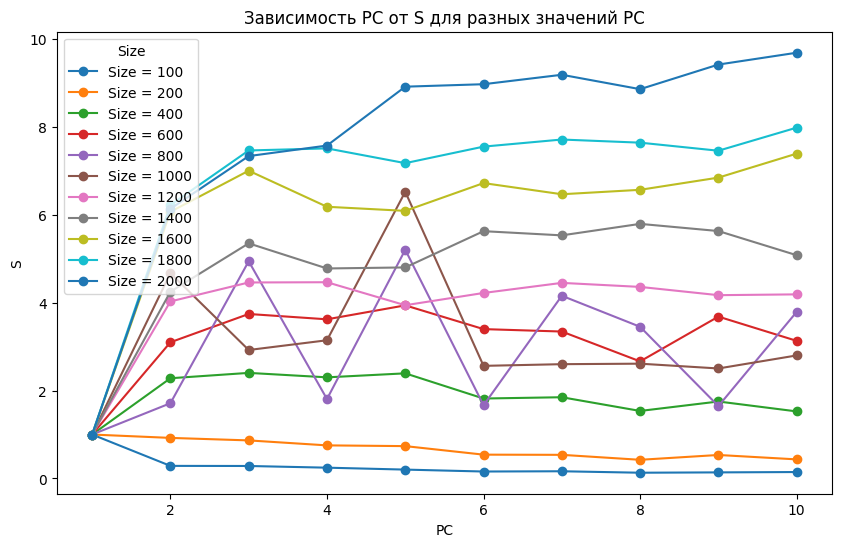

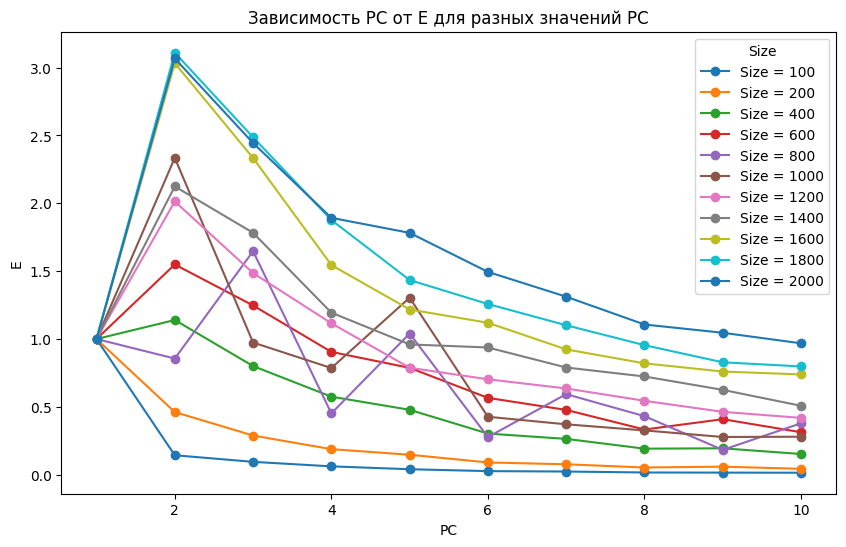

In [57]:
def plot_axis2(name):
    # Создание фигуры и оси
    fig, ax = plt.subplots(figsize=(10, 6))



    # Цикл по каждому уникальному значению PC
    for size in [100] + list(range(200, 2001, 200)):
        # Фильтрация данных по текущему значению PC
        subset = df.query(f'Size == {size}').sort_values('PC')
        
        # Построение линии для текущего PC
        ax.plot(subset['PC'], subset[name], marker='o', linestyle='-', label=f'Size = {size}')

    # Настройка подписей и легенды
    # ax.set_yscale('log')
    ax.set_xlabel('PC')
    ax.set_ylabel(name)
    ax.legend(title='Size')

    # Название графика
    plt.title('Зависимость PC от ' + name + ' для разных значений PC')

    # Показ графика
    plt.show()
    return fig


f = plot_axis2('S')

f.savefig("./plot_1.svg", format="svg", bbox_inches='tight')
f = plot_axis2('E')
f.savefig("./plot_2.svg", format="svg", bbox_inches='tight')